# Nikkei High Dividend Yield 50 Analysis with Portfolio Optimizer



## Initialization

If you are using CoLab, first install the dependency PyPortfolioOpt

In [ ]:
!pip install git+https://github.com/robertmartin8/PyPortfolioOpt.git

Then get our PortfolioOptimizer library

In [1]:
!wget https://raw.githubusercontent.com/cartasuzuki/phynance/master/PortfolioOptimizer.py

--2019-02-23 06:08:30--  https://raw.githubusercontent.com/cartasuzuki/phynance/master/PortfolioOptimizer.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.72.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.72.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2701 (2.6K) [text/plain]
Saving to: ‘PortfolioOptimizer.py.15’

PortfolioOptimizer. 100%[===================>]   2.64K  --.-KB/s    in 0s      

2019-02-23 06:08:32 (60.0 MB/s) - ‘PortfolioOptimizer.py.15’ saved [2701/2701]



Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PortfolioOptimizer import PortfolioOptimizer

Get Dataset

In [5]:
stock_symbols = pd.read_csv('https://raw.githubusercontent.com/cartasuzuki/phynance/master/datasets/nikkei_high_dividend_yield_50_weight_en.csv')

Once we have loaded our stock symbols dataset we can either use the prices in the csv file or download prices from alphadvantage to get updated data.

### Filter out some stocks from the index

Chose a minimum div/yield. Set to 0 if you want to use all stocks in the index

In [6]:
min_yield = 3.7

In [7]:
selected_stocks = stock_symbols[stock_symbols['Dividend']>min_yield]

Create a filter string (highDivString) to be used later to filter stocks with lower yield than min_yield

In [8]:
highDivString = selected_stocks['Code'].values.astype(int)
highDivString = highDivString.astype(str)
string = '.TOK'
highDivString = [x + string for x in highDivString]

### Method 1: use csv file

Read the stock prices from the csv provided in our repository

In [10]:
stocks = pd.read_csv('https://raw.githubusercontent.com/cartasuzuki/phynance/master/datasets/nikkei_high_dividend_yield_50_prices.csv', index_col= ['timestamp'], parse_dates= ['timestamp'])

If you want higher yield filter out using the filter previously created

In [11]:
stocks = stocks[highDivString]

### Method 2: Get prices from alphadvantage

Using the highDivString filter, download prices from alpadvantage

In [ ]:
stocks = PortfolioOptimizer.get_stock_prices(highDivString)  

## Remove some stocks to improve sectore coverage

In [12]:
droplist = ['8002.TOK','8058.TOK','2768.TOK' ]
stocks = stocks.drop(droplist, axis = 1)

## Portfolio Optimization

In [13]:
weights, sharpe, ret = PortfolioOptimizer.optimize_portfolio(stocks,0)

8035.TOK: 37.0%
8053.TOK: 24.0%
8628.TOK: 19.0%
9437.TOK: 15.0%
Sharpe: 0.36
Exp. Return: 9.49


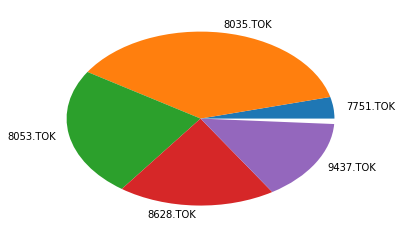

In [14]:
PortfolioOptimizer.print_portfolio_result(weights, sharpe, ret)
PortfolioOptimizer.portfolioAsPieChart(weights)

Average yield

In [15]:
selected_stocks['Dividend'].mean()

4.3795238095238105

Remove 0s and TOK string.

In [16]:
www ={x:y for x,y in weights.items() if y>0.001}
portfolio =list(www.keys())
portfoliovalues = list(www.values())
portfolio = [s.replace('.TOK','') for s in portfolio]

### Resulting Portfolio and Yield

In [17]:
selected_stocks = selected_stocks[selected_stocks['Code'].isin(portfolio)]
selected_stocks['Weight'] = portfoliovalues

In [18]:
selected_stocks

,Date of Data,Code,Company Name,Nikkei Industrial Classification,Weight,Dividend
26,2018/11/30,7751,CANON INC.,Electric Machinery,0.04,4.31
30,2018/11/30,8035,TOKYO ELECTRON LTD.,Electric Machinery,0.37,4.03
31,2018/11/30,8053,SUMITOMO CORP.,Trading Companies,0.24,4.10
42,2018/11/30,8628,"MATSUI SECURITIES CO., LTD.",Securities,0.19,8.26
48,2018/11/30,9437,"NTT DOCOMO, INC.",Communications,0.15,3.90


In [19]:
 Div_Yield = np.average(selected_stocks['Dividend'], weights=selected_stocks['Weight'])
round(Div_Yield, 2)

4.85